# Sample Dataset

Data acquired from: https://support.minitab.com/en-us/datasets/regression-data-sets/drug-shelf-life-data-with-random-batches/

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [8]:
import zipfile
import os

mwx_file_path = 'ShelfLifeRandomBatches.MWX'
extract_dir = 'Extracted_ShelfLife'

with zipfile.ZipFile(mwx_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [9]:
data = json.load(open('Extracted_ShelfLife/sheets/0/sheet.json'))
data['Data']['Columns']

[{'ClassId': 434,
  'DefaultBody': False,
  'VarId': {'ClassId': 440,
   'Variable': 3,
   'Copy': False,
   'Attached': True,
   'VarId': 1},
  'WorksheetVarBody': {'ClassId': 437,
   'Name': 'RunOrder',
   'Desc': '',
   'Format': {'Key': 1,
    'Value': {'ClassId': 17,
     'AutoFormat': True,
     'MissingValueLabel': '*',
     'PrevMissingValueLabel': '*',
     'StrToStr': [],
     'DataToStr': [],
     'Numeric': 2,
     'NumDecPlaces': 0,
     'PlacesToLeft': 2,
     'MinValue': 1.0,
     'MaxValue': 72.0,
     'Subtype': 0,
     'ShowFullPrecision': False,
     'Class_Version': [3, 1]}},
   'VarData': {'ClassId': 439,
    'VariableType': 3,
    'Data': 1,
    'VarDataBody': {'ClassId': 447,
     'CellCt': 72,
     'ColCt': 1,
     'CharCt': 0,
     'HasNumericData': True,
     'NumericData': [1.0,
      2.0,
      3.0,
      4.0,
      5.0,
      6.0,
      7.0,
      8.0,
      9.0,
      10.0,
      11.0,
      12.0,
      13.0,
      14.0,
      15.0,
      16.0,
      17.0,

In [10]:
columns = data['Data']['Columns']
df_data = {}

for col in columns:
    name = col['WorksheetVarBody']['Name']
    var_data_body = col['WorksheetVarBody']['VarData']['VarDataBody']

    if var_data_body.get('HasNumericData', False):
        values = var_data_body['NumericData']
        
    elif var_data_body.get('HasTextData', False):
        
        values = var_data_body['TextData']
        
    else:
        values = []

    df_data[name] = values


df = pd.DataFrame(df_data)
df.sort_values(by=['RunOrder'], inplace= True)
df.reset_index(drop=True)

df

,RunOrder,Month,Batch,Drug%
0,1.0,0.0,8,99.501
1,2.0,0.0,7,99.724
2,3.0,0.0,2,101.052
3,4.0,0.0,5,99.922
4,5.0,0.0,3,99.775
...,...,...,...,...
67,68.0,48.0,4,93.282
68,69.0,48.0,6,92.030
69,70.0,48.0,8,92.700
70,71.0,48.0,5,93.614


<Axes: xlabel='Month', ylabel='Drug%'>

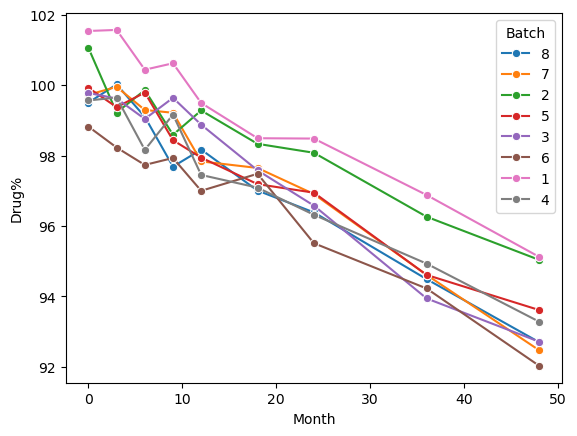

In [11]:
sns.lineplot(data = df, x = 'Month', y = 'Drug%',hue = 'Batch', marker = 'o')

Seems like there are no outliers here.

In [13]:
df.to_excel("data5.xlsx", index=False)